# Practical 9

## Implement an audio analysis and audio classification task on any of the datasets given from the below link: https://towardsdatascience.com/40-open-source-audio-datasets-for-ml-59dc39d48f06

# Tasks

Load dataset.
Process each audio file and extract features from it (Use PyAudioAnalysis) or represent them in form of spectrograms (Use Librosa library).
Display spectrograms.
Perform ML or DL based classification depending on the task.

In [1]:
# Practical 9

# Implement an audio analysis and audio classification task on any of the datasets given from the below link: https://towardsdatascience.com/40-open-source-audio-datasets-for-ml-59dc39d48f06

# Tasks

# Load dataset.
# Process each audio file and extract features from it (Use PyAudioAnalysis) or represent them in form of spectrograms (Use Librosa library).
# Display spectrograms.
# Perform ML or DL based classification depending on the task.


import os
import librosa
import librosa.display
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# use MNIST dataset in voice
# https://www.kaggle.com/primaryobjects/voicegender

# download dataset
# from https://github.com/soerenab/AudioMNIST




In [2]:
!git clone https://github.com/soerenab/AudioMNIST


Cloning into 'AudioMNIST'...
remote: Enumerating objects: 30122, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 30122 (delta 0), reused 0 (delta 0), pack-reused 30119
Receiving objects: 100% (30122/30122), 944.54 MiB | 18.71 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (30018/30018), done.


In [9]:
!pip install pydub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(1025, 29)

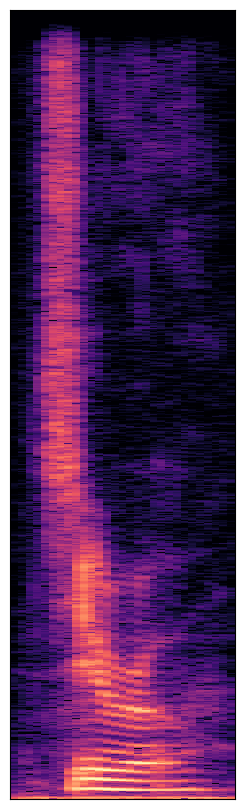

In [5]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
# from pyAudioAnalysis import audioBasicIO
# from pyAudioAnalysis import ShortTermFeatures

# Load dataset
data, sampling_rate = librosa.load('/content/AudioMNIST/data/02/0_02_0.wav')
# Represent audio in form of spectrograms using Librosa
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(2.9, 10.25))
librosa.display.specshow(Xdb, sr=sampling_rate)
plt.savefig('/content/001.png', bbox_inches='tight', pad_inches=0)
X.shape

In [9]:
import matplotlib
from IPython.display import clear_output 



matplotlib.use('Agg')
import matplotlib.pyplot as plt

X = []
y = []
from tqdm import tqdm

# make folders from 0 to 9
# for i in range(10):
    # os.mkdir('/content/'+str(i))

path = '/content/AudioMNIST/data/'
# loop through all the folders
for folder in tqdm(os.listdir(path)):
    # loop through all the audio files
    for file in tqdm(os.listdir(path+folder)):
        # load audio file
        data, sampling_rate = librosa.load(path+folder+'/'+file)
        # convert audio to spectrograms
        xi = librosa.stft(data)
        xiabs = librosa.amplitude_to_db(abs(xi))
        # generate spectrogram image and save it to folder with label name
        plt.figure(figsize=(2.9, 10.25))
        librosa.display.specshow(xiabs, sr=sampling_rate)
        clear_output()
        label = file.split('_')[0]
        plt.savefig('/content/'+str(label)+'/'+file.split('.')[0]+'.png', bbox_inches='tight', pad_inches=0)
        plt.close()


 52%|█████▏    | 32/61 [46:26<42:05, 87.09s/it]


NotADirectoryError: ignored

In [10]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

# Set parameters
data_dir = '/content' # path to folder with subfolders containing mel spectrogram images
image_size = (128, 128) # image size to resize to
test_size = 0.2 # fraction of data to use for testing

# Load data from folder structure
X = []
y = []
for class_label in range(10):
    class_dir = os.path.join(data_dir, str(class_label))
    for filename in os.listdir(class_dir):
        filepath = os.path.join(class_dir, filename)
        image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, image_size)
        X.append(image)
        y.append(class_label)

# Convert data to numpy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score

# Set parameters
input_shape = (128, 128, 1) # image size and number of channels (1 for grayscale)
num_classes = 10 # number of classes (0-9)
batch_size = 32 # batch size for training
epochs = 10 # number of training epochs

# Preprocess data
X_train = X_train.reshape(-1, *input_shape)
X_test = X_test.reshape(-1, *input_shape)
X_train = X_train / 255.0 # normalize pixel values
X_test = X_test / 255.0

# Define model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate model on test data
y_pred = model.predict_classes(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)


Epoch 1/10
400/400 [==============================] - 405s 1s/step - loss: 0.6239 - accuracy: 0.7925 - val_loss: 0.0977 - val_accuracy: 0.9706
Epoch 2/10
400/400 [==============================] - 399s 997ms/step - loss: 0.2021 - accuracy: 0.9342 - val_loss: 0.0668 - val_accuracy: 0.9803
Epoch 3/10
400/400 [==============================] - 390s 976ms/step - loss: 0.1530 - accuracy: 0.9509 - val_loss: 0.0452 - val_accuracy: 0.9850
Epoch 4/10
400/400 [==============================] - 404s 1s/step - loss: 0.1246 - accuracy: 0.9583 - val_loss: 0.0436 - val_accuracy: 0.9859
Epoch 5/10
269/400 [===================>..........] - ETA: 2:04 - loss: 0.1035 - accuracy: 0.9650

KeyboardInterrupt: ignored

In [12]:
import pickle

# Set path for saving data
data_dir = '/content/'

# Save preprocessed data
with open(os.path.join(data_dir, 'X_train.pkl'), 'wb') as f:
    pickle.dump(X_train, f)
with open(os.path.join(data_dir, 'X_test.pkl'), 'wb') as f:
    pickle.dump(X_test, f)
with open(os.path.join(data_dir, 'y_train.pkl'), 'wb') as f:
    pickle.dump(y_train, f)
with open(os.path.join(data_dir, 'y_test.pkl'), 'wb') as f:
    pickle.dump(y_test, f)


In [24]:
from sklearn.metrics import classification_report

# Generate classification report
# y_pred = model.predict(X_test)
y_pred.shape
y_pred1 = np.round(y_pred).astype(int)
print(y_test.shape)
y_pred_labels = np.argmax(y_pred, axis=1)


(3200,)


In [25]:
from sklearn.metrics import classification_report

# Assume that y_true and y_pred are the true and predicted labels, respectively
# Make sure that y_true and y_pred are 1D numpy arrays or lists of integers
y_test = np.array(y_test)
y_pred1 = np.round(y_pred).astype(int)

# Make sure that y_true and y_pred have the same shape
if y_test.shape != y_pred_labels.shape:
    print("Error: y_true and y_pred have different shapes")
else:
    # Generate the classification report
    target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    print(classification_report(y_test, y_pred_labels, target_names=target_names))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       304
           1       0.99      0.99      0.99       304
           2       0.99      0.99      0.99       330
           3       1.00      0.98      0.99       334
           4       0.99      1.00      0.99       332
           5       0.99      0.99      0.99       358
           6       1.00      0.99      1.00       340
           7       0.99      0.99      0.99       310
           8       0.99      0.99      0.99       288
           9       0.99      0.99      0.99       300

    accuracy                           0.99      3200
   macro avg       0.99      0.99      0.99      3200
weighted avg       0.99      0.99      0.99      3200

